In [1]:
%config IPCompleter.greedy=True
get_ipython().run_line_magic('config', 'IPCompleter.greedy=True')
import IPython.display as ipd

In [2]:
import librosa
data, sampling_rate = librosa.load(r'''samples\1.wav''')
data

array([-0.00057799,  0.00344364, -0.00010096, ..., -0.00299958,
       -0.00150843, -0.00410081], dtype=float32)

Populating the interactive namespace from numpy and matplotlib


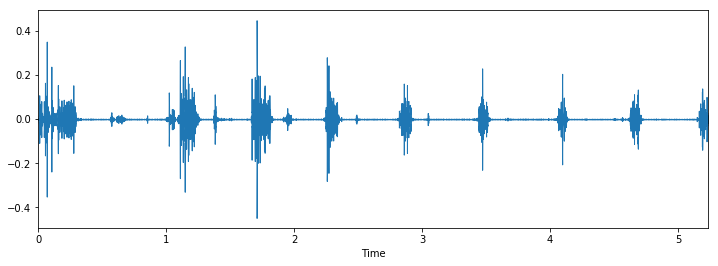

In [3]:
get_ipython().run_line_magic('pylab', 'inline')
import os
import pandas as pd
import librosa
import librosa.display
import glob 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

Class:  apple


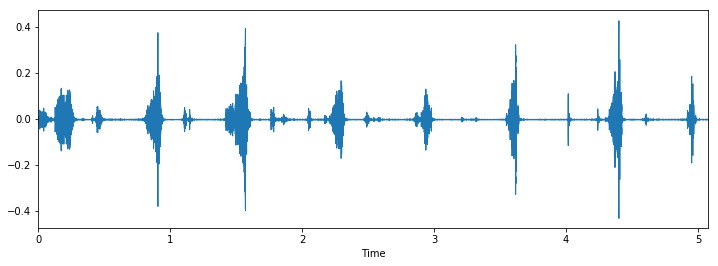

Class:  carrot


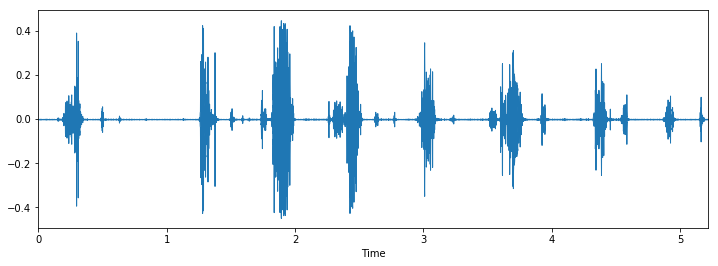

Class:  oreo


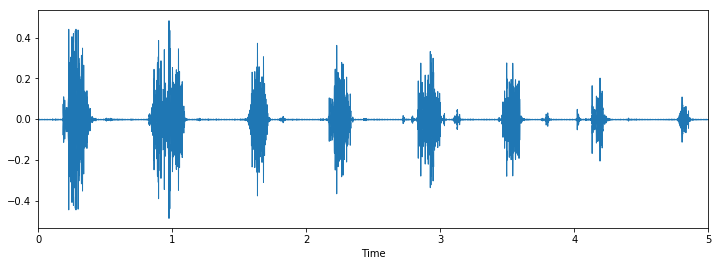

Class:  pepper


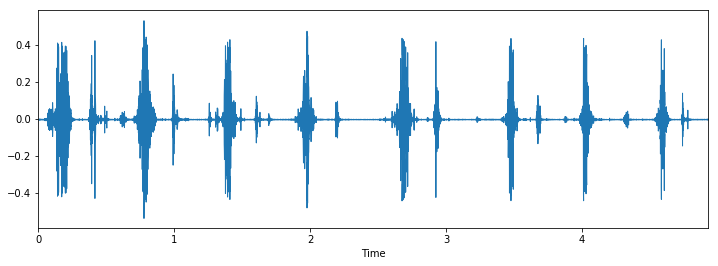

Class:  apple


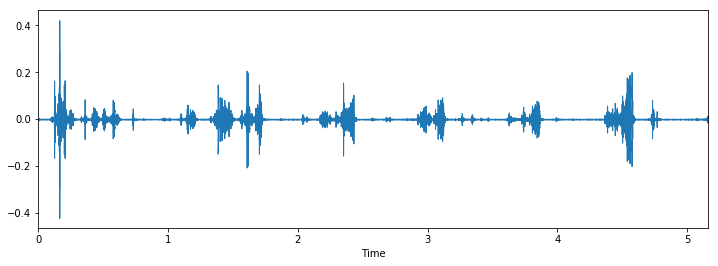

Class:  chips


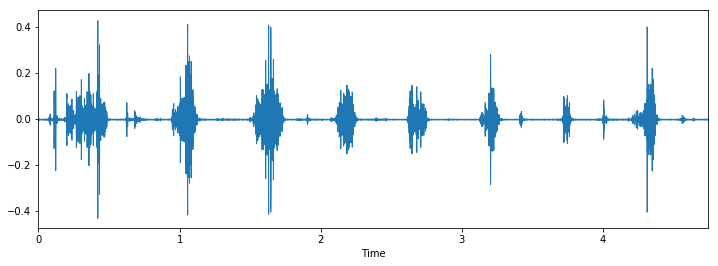

Class:  chips


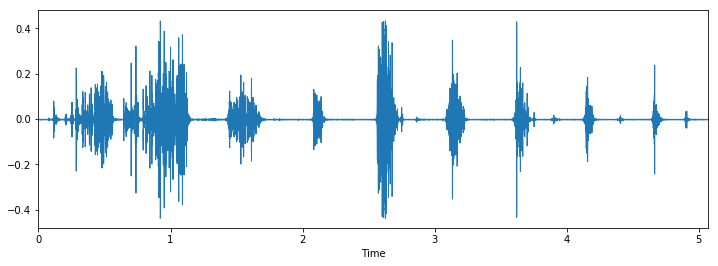

Class:  apple


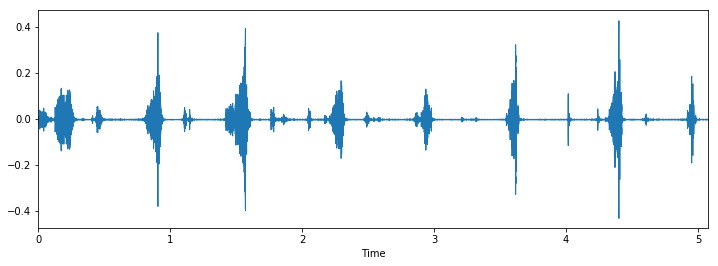

Class:  pepper


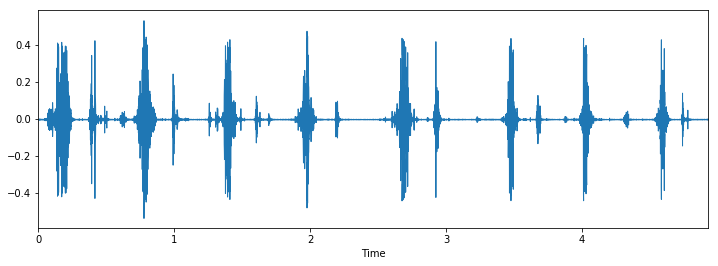

Class:  carrot


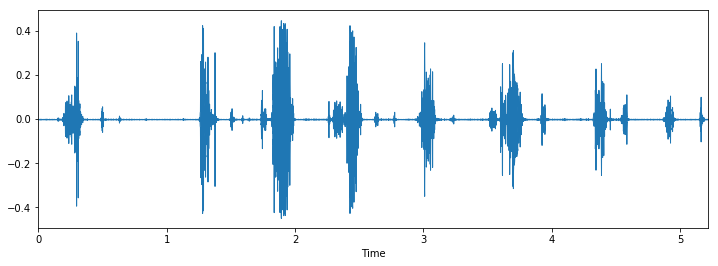

In [4]:
import time
train = pd.read_csv(r'''samples\train.csv''')
data_dir = r'''samples'''
def load_wave():
    i = random.choice(train.index)

    audio_name = train.ID[i]
    path = os.path.join(data_dir, str(audio_name) + '.wav')

    print('Class: ', train.Class[i])
    x, sr = librosa.load(path)

    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(x, sr=sr)
    plt.show()

for i in range(10):
    load_wave()

Class:  pepper


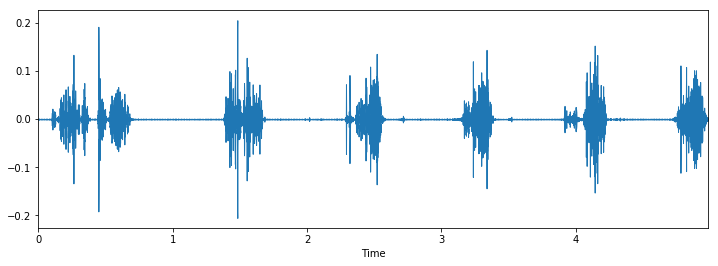

In [5]:
i = random.choice(train.index)

audio_name = train.ID[i]
path = os.path.join(data_dir, str(audio_name) + '.wav')

print('Class: ', train.Class[i])
x, sr = librosa.load(r'''samples\\''' + str(train.ID[i]) + '.wav')

plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

In [6]:
train.Class.value_counts()

apple     5
carrot    4
chips     4
pepper    4
salad     3
oreo      1
Name: Class, dtype: int64

In [7]:
def parser(row):
   # function to load files and extract features
   file_name = os.path.join(os.path.abspath(data_dir), str(row.ID) + '.wav')

   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file)
      return None, None
 
   feature = mfccs
   label = row.Class
 
   return [feature, label]

temp = train.apply(parser, axis=1, result_type="expand")
temp.columns = ['feature', 'label']
temp.head(2)

,feature,label
0,"[-437.38267777135934, 81.56379524289974, -1.38...",salad
1,"[-428.798613046622, 79.97818024286276, -9.3687...",salad


In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

X = np.array(temp.feature.tolist())
y = np.array(temp.label.tolist())

lb = LabelEncoder()
print(lb.fit_transform(y)[:5])
y = np_utils.to_categorical(lb.fit_transform(y))
print(y.shape)
print(y[:10])

Using Theano backend.


[5 5 5 4 4]
(21, 6)
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = y.shape[1]
filter_size = 2

# build model
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [10]:
model.fit(X, y, batch_size=32, epochs=500, validation_split=0.1, shuffle=True)

Train on 18 samples, validate on 3 samples
Epoch 1/500
18/18 [==============================] - 0s 867us/step - loss: 14.3272 - acc: 0.1111 - val_loss: 4.2941 - val_acc: 0.0000e+00
Epoch 2/500
18/18 [==============================] - 0s 867us/step - loss: 13.4317 - acc: 0.1667 - val_loss: 4.2941 - val_acc: 0.0000e+00
Epoch 3/500
18/18 [==============================] - 0s 0us/step - loss: 15.4714 - acc: 0.0000e+00 - val_loss: 11.2619 - val_acc: 0.0000e+00
Epoch 4/500
18/18 [==============================] - 0s 0us/step - loss: 12.0985 - acc: 0.1667 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 5/500
18/18 [==============================] - 0s 0us/step - loss: 14.2611 - acc: 0.1111 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 6/500
18/18 [==============================] - 0s 867us/step - loss: 10.0714 - acc: 0.3333 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 7/500
18/18 [==============================] - 0s 0us/step - loss: 12.5233 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0

Epoch 60/500
18/18 [==============================] - 0s 0us/step - loss: 13.3365 - acc: 0.1111 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 61/500
18/18 [==============================] - 0s 867us/step - loss: 13.4317 - acc: 0.1667 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 62/500
18/18 [==============================] - 0s 0us/step - loss: 13.4317 - acc: 0.1667 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 63/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 64/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 65/500
18/18 [==============================] - 0s 867us/step - loss: 11.1145 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 66/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 67/500
18/18 [========

Epoch 119/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 120/500
18/18 [==============================] - 0s 2ms/step - loss: 13.4317 - acc: 0.1667 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 121/500
18/18 [==============================] - 0s 0us/step - loss: 13.4317 - acc: 0.1667 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 122/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 123/500
18/18 [==============================] - 0s 0us/step - loss: 13.4317 - acc: 0.1667 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 124/500
18/18 [==============================] - 0s 867us/step - loss: 13.4317 - acc: 0.1667 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 125/500
18/18 [==============================] - 0s 0us/step - loss: 13.4317 - acc: 0.1667 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 126/500
18/18 [==

Epoch 178/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 179/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 180/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 181/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 182/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 183/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 184/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 185/500
18/18 [==

Epoch 237/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 238/500
18/18 [==============================] - 0s 3ms/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 239/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 240/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 241/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 242/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 243/500
18/18 [==============================] - 0s 2ms/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 244/500
18/18 [==

Epoch 296/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 297/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 298/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 299/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 300/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 301/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 302/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 303/500
18/

Epoch 355/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 356/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 357/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 358/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 359/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 360/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 361/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 362/500
18/18 [

Epoch 414/500
18/18 [==============================] - 0s 867us/step - loss: 12.3057 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 415/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 416/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 417/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 418/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 419/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 420/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 421/500

Epoch 473/500
18/18 [==============================] - 0s 867us/step - loss: 13.4317 - acc: 0.1667 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 474/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 475/500
18/18 [==============================] - 0s 0us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 476/500
18/18 [==============================] - 0s 3ms/step - loss: 13.4335 - acc: 0.1667 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 477/500
18/18 [==============================] - 0s 867us/step - loss: 12.5363 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 478/500
18/18 [==============================] - 0s 0us/step - loss: 11.9148 - acc: 0.2222 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 479/500
18/18 [==============================] - 0s 0us/step - loss: 11.6408 - acc: 0.2778 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 480/500
18/18 [==

In [79]:
result = model.predict(X)
labels = lb.inverse_transform(range(result.shape[1]))
maxidx = result.argmax(1)
for i in range(len(train)):
    print("orig: %s\tfound: %s\tconfidence: %.2f" % (temp.label[i], labels[maxidx[i]], result[i,maxidx[i]]))

orig: salad	found: salad	confidence: 1.00
orig: salad	found: salad	confidence: 1.00
orig: salad	found: salad	confidence: 1.00
orig: pepper	found: pepper	confidence: 0.99
orig: pepper	found: pepper	confidence: 1.00
orig: pepper	found: pepper	confidence: 0.98
orig: pepper	found: apple	confidence: 1.00
orig: oreo	found: oreo	confidence: 1.00
orig: chips	found: chips	confidence: 0.99
orig: chips	found: chips	confidence: 1.00
orig: chips	found: chips	confidence: 1.00
orig: chips	found: chips	confidence: 0.89
orig: carrot	found: carrot	confidence: 1.00
orig: carrot	found: carrot	confidence: 1.00
orig: carrot	found: carrot	confidence: 1.00
orig: carrot	found: carrot	confidence: 1.00
orig: apple	found: apple	confidence: 1.00
orig: apple	found: apple	confidence: 1.00
orig: apple	found: carrot	confidence: 1.00
orig: apple	found: apple	confidence: 1.00
orig: apple	found: chips	confidence: 0.34
